In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [2]:
labels=['Open','High','Low','Volume','OpenInt']

In [3]:
ip = pd.read_csv("Downloads/Stock.csv")

In [4]:
ip

,Date,Open,High,Low,Close,Volume,OpenInt
0,18-11-1999,30.713,33.754,27.002,29.702,66277506,0
1,19-11-1999,28.986,29.027,26.872,27.257,16142920,0
2,22-11-1999,27.886,29.702,27.044,29.702,6970266,0
3,23-11-1999,28.688,29.446,27.002,27.002,6332082,0
4,24-11-1999,27.083,28.309,27.002,27.717,5132147,0
...,...,...,...,...,...,...,...
4516,06-11-2017,68.220,68.450,68.220,68.220,995731,0
4517,07-11-2017,68.320,68.640,68.040,68.250,966466,0
4518,08-11-2017,68.100,68.330,67.771,68.110,972616,0
4519,09-11-2017,67.920,67.980,66.910,67.470,1673083,0


In [5]:
X=ip.drop('Close',axis=1).drop('Date',axis=1)
y=ip['Close']

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)

MinMaxScaler(copy=True, feature_range=(0, 1))


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [8]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
pred = regressor.predict(X_test)

In [10]:
pred

array([55.75168294, 21.54437695, 13.65380506, 36.83363645, 41.33090065,
       25.51721454, 30.65502914, 46.37150519, 23.05583929, 14.02079263,
       46.51163156, 32.68003192, 20.75211527, 26.28891621, 21.19071403,
       20.32653113, 14.64410232, 38.9986393 , 39.15236573, 19.37708464,
       21.7364054 , 22.34183648, 24.62060167,  9.97798807, 12.76328242,
       27.74192319, 38.18693651, 12.85987913, 46.0384362 , 14.90706278,
       50.6182872 , 24.15700768, 16.78941859, 40.93984553, 24.42041173,
       42.23088113, 17.88757723, 30.35796029, 24.80407455, 20.75773297,
       23.44145381, 39.40213718, 45.01849714, 51.89630373, 31.5250698 ,
       25.55370696, 26.15845686, 20.93844802, 25.50032539, 17.71644861,
       40.64991135, 40.79581175, 39.77898386, 34.75558884, 45.98340478,
       24.32531578, 16.20482119, 31.81191314, 25.16464415, 41.4858424 ,
       23.9634373 , 20.00107797, 45.02996615, 11.20890378, 14.75041486,
       16.63216257, 18.80092695, 19.89334856, 22.32555853, 23.05

In [11]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.6940602338830809
0.9970951059721069
0.3468786228164318


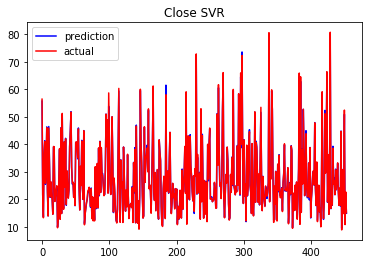

In [16]:
x=np.arange(0,453)
plt.title('Close SVR')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

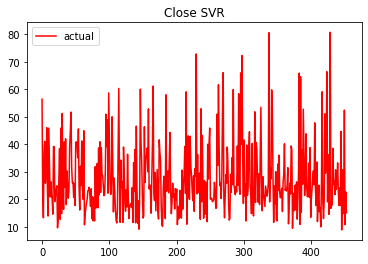

In [17]:
x=np.arange(0,453)
plt.title('Close SVR')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

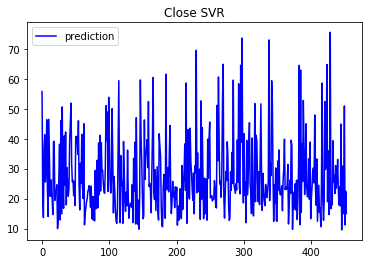

In [18]:
x=np.arange(0,453)
plt.title('Close SVR')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()